In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix
import pandas as pd

In [2]:
#Generate graphs of 2-hop neighbourhood
def graph_gen(nodeid, G):
    
    num_hops = 2  
    nodes = []
    edges = []
    #Get small graph nodes
    nodes = nx.single_source_shortest_path_length(G, nodeid, cutoff=num_hops).keys() 
    graph = nx.ego_graph(G,nodeid, num_hops, center=True,undirected = True)
    #Get small graph edges
    edges = [e for e in graph.edges]
    plot_graph(graph)
    print('nodeid',nodeid)
    print('node count',len(nodes))
    print('edge count',len(edges))
    return nodes, edges, graph


In [3]:
def plot_graph(G):
    nx.draw(G, with_labels = True)
    print('node count',G.number_of_nodes())
    print('edge count',G.number_of_edges())
    plt.show()

In [4]:
def get_node_degree(G):
    #Adding node degree
    for node in G.nodes():
        d = G.degree(node)
        G.nodes[node]["degree"] = d
    return G

In [5]:
# Compute min, max, mean degree
def statistics_degrees(G):

    degrees = [G.degree(n) for n in G.nodes()]
    return np.max(degrees), np.min(degrees), np.mean(degrees)

In [6]:
def evaluation(real_graph, syn_graph):

    print("Clustering coefficient ratio for real graph: ", nx.average_clustering(real_graph))
    print("Clustering coefficient ratio for generated graph: ", nx.average_clustering(syn_graph))

    
    print("Average path length for real graph: ",nx.average_shortest_path_length(real_graph))
    print("Average path length for synthetic graph: ",nx.average_shortest_path_length(syn_graph))
    
    print("Max, Min,Mean of real graph: ",statistics_degrees(real_graph))
    print("Max, Min,Mean of syn graph: ",statistics_degrees(syn_graph))
    
    

DBLP

In [7]:
G_real_dblp = nx.read_gexf("DBLP_four_area_real.gexf")
G_syn_dblp = nx.read_gexf("DBLP_four_area_hgen.gexf")

In [8]:
node_subset_real = dict((n,d['degree']) for n,d in get_node_degree(G_real_dblp).nodes().items() if d['degree']==2)
node_subset_syn = dict((n,d['degree']) for n,d in get_node_degree(G_syn_dblp).nodes().items() if d['degree']==2)

In [9]:
real_first_value = list(node_subset_real.keys())[20]
syn_first_value = list(node_subset_syn.keys())[20]

node count 6
edge count 5


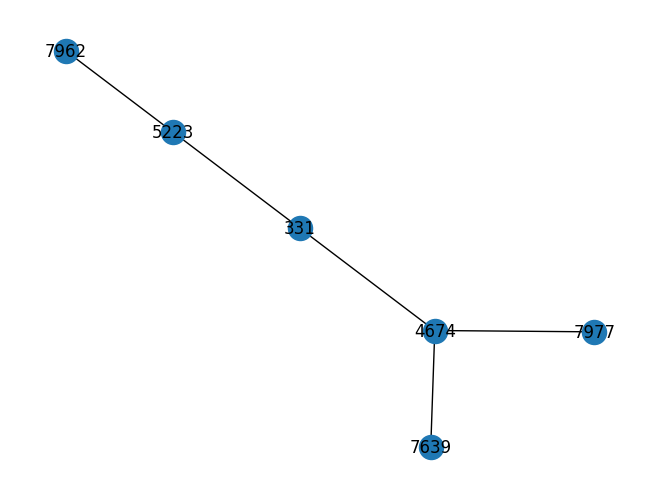

nodeid 331
node count 6
edge count 5


In [10]:
real_nodes, real_nodes, real_small_graph = graph_gen(real_first_value, G_real_dblp)

node count 7
edge count 6


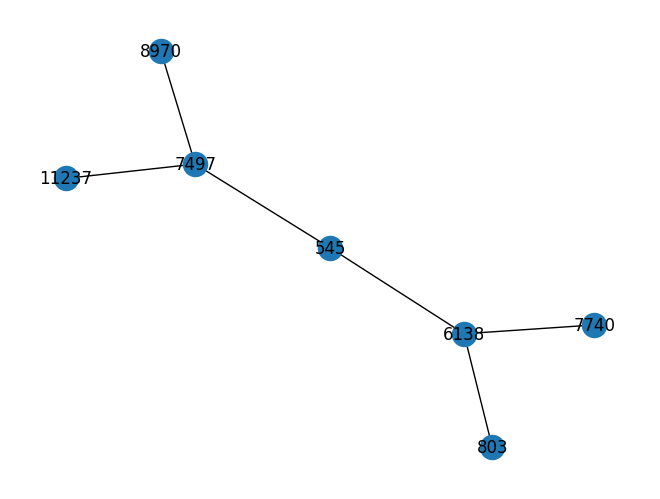

nodeid 545
node count 7
edge count 6


In [11]:
syn_nodes, syn_nodes, syn_small_graph = graph_gen(syn_first_value, G_syn_dblp)

In [12]:
evaluation(real_small_graph, syn_small_graph)

Clustering coefficient ratio for real graph:  0.0
Clustering coefficient ratio for generated graph:  0.0
Average path length for real graph:  2.1333333333333333
Average path length for synthetic graph:  2.2857142857142856
Max, Min,Mean of real graph:  (3, 1, 1.6666666666666667)
Max, Min,Mean of syn graph:  (3, 1, 1.7142857142857142)


PubMed

In [13]:
G_real_pubmed = nx.read_gexf("PubMed_real.gexf")

In [14]:
G_syn_pubmed = nx.read_gexf("PubMed_hgen.gexf")

In [15]:
node_subset_real = dict((n,d['degree']) for n,d in get_node_degree(G_real_pubmed).nodes().items() if d['degree']==2)
node_subset_syn = dict((n,d['degree']) for n,d in get_node_degree(G_syn_pubmed).nodes().items() if d['degree']==2)

In [16]:
real_first_value = list(node_subset_real.keys())[20]
syn_first_value = list(node_subset_syn.keys())[20]

node count 36
edge count 92


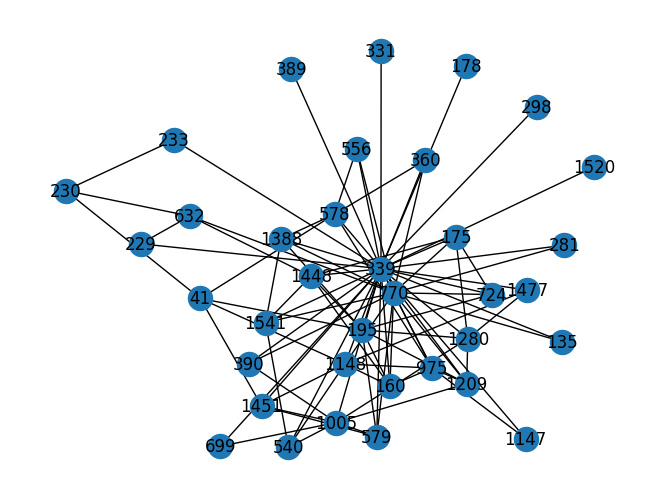

nodeid 233
node count 36
edge count 92


In [17]:
real_nodes, real_nodes, real_small_graph = graph_gen(real_first_value, G_real_pubmed)

node count 34
edge count 39


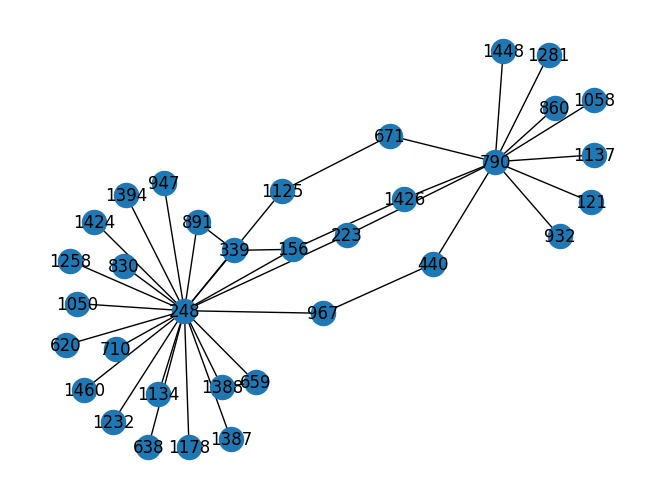

nodeid 223
node count 34
edge count 39


In [18]:
syn_nodes, syn_nodes, syn_small_graph = graph_gen(syn_first_value, G_syn_pubmed)

In [19]:
evaluation(real_small_graph, syn_small_graph)

Clustering coefficient ratio for real graph:  0.39737689878818905
Clustering coefficient ratio for generated graph:  0.11802902979373568
Average path length for real graph:  1.9333333333333333
Average path length for synthetic graph:  2.5668449197860963
Max, Min,Mean of real graph:  (32, 1, 5.111111111111111)
Max, Min,Mean of syn graph:  (22, 1, 2.2941176470588234)


IMDB

In [20]:
G_real_imdb = nx.read_gexf("IMDB_movie_real.gexf")

In [21]:
G_syn_imdb = nx.read_gexf("IMDB_movie_hgen.gexf")

In [22]:
#For IMDB, remove the Genre node type
def remove_genre_nodes(graph):
    nodeId_list = []
    node_type_list = []
    for key, value in graph.nodes(data=True):
        nodeId_list.append(key)
        node_type_list.append(value['class'])


    df_graph = pd.DataFrame()
    df_graph["nodeId"] = nodeId_list
    df_graph["class"] = node_type_list 
    node3_list = list(df_graph[df_graph['class'] == 3]['nodeId'])

    df_edges = nx.to_pandas_edgelist(graph)
    df_edges = df_edges[['source','target']]
    df_edges = df_edges[~df_edges['source'].isin(node3_list)]
    df_edges= df_edges[~df_edges['target'].isin(node3_list)]
    
    small_graph = nx.from_pandas_edgelist(
    df_edges,

    create_using=nx.Graph(),
)
    
    return small_graph

In [23]:
node_subset_real = dict((n,d['degree']) for n,d in get_node_degree(G_real_imdb).nodes().items() if d['degree']==2)
node_subset_syn = dict((n,d['degree']) for n,d in get_node_degree(G_syn_imdb).nodes().items() if d['degree']==2)

In [24]:
real_first_value = list(node_subset_real.keys())[15]
syn_first_value = list(node_subset_syn.keys())[15]

node count 8
edge count 8


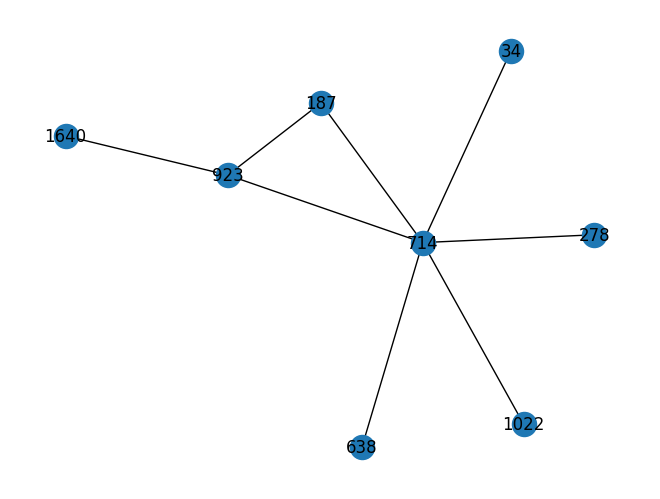

nodeid 187
node count 8
edge count 8


In [25]:
#Original graph
real_nodes, real_nodes, real_small_graph = graph_gen(real_first_value, G_real_imdb)

node count 7
edge count 7


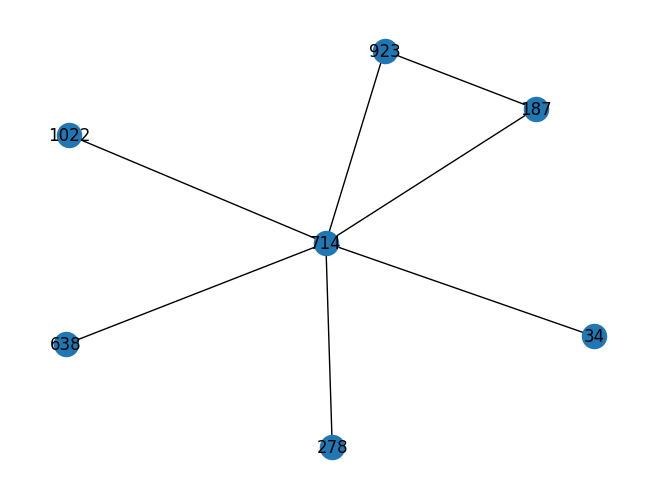

In [26]:
real_small_graph = remove_genre_nodes(real_small_graph)
#After removing Genre node types
plot_graph(real_small_graph)

node count 10
edge count 11


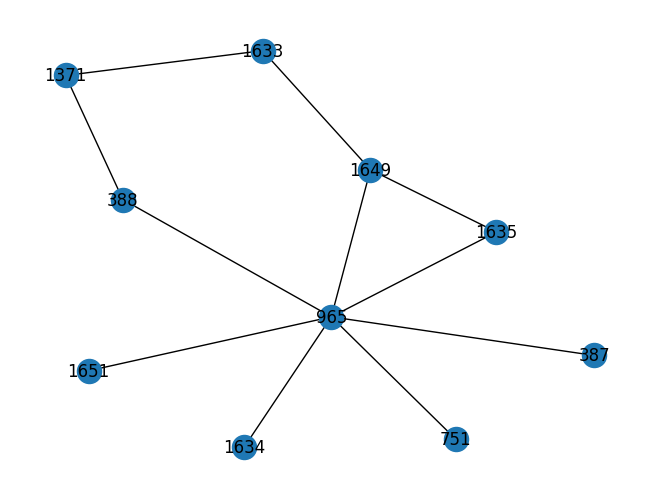

nodeid 388
node count 10
edge count 11


In [27]:
#Original graph
syn_nodes, syn_nodes, syn_small_graph = graph_gen(syn_first_value, G_syn_imdb)

node count 5
edge count 4


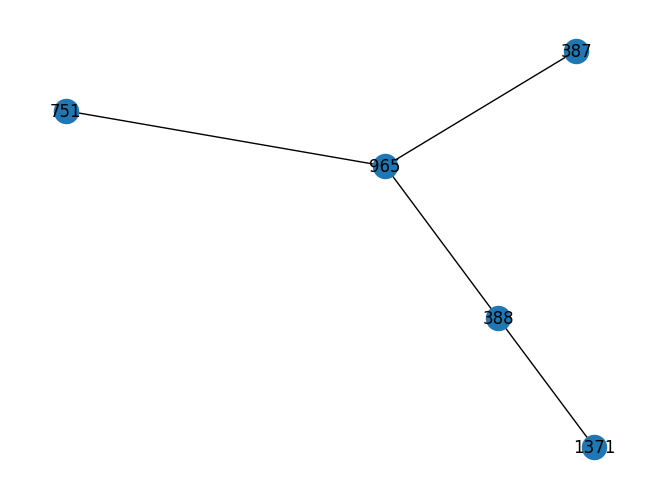

In [28]:
syn_small_graph = remove_genre_nodes(syn_small_graph)
#After removing Genre node types
plot_graph(syn_small_graph)

In [29]:
evaluation(real_small_graph, syn_small_graph)

Clustering coefficient ratio for real graph:  0.2952380952380952
Clustering coefficient ratio for generated graph:  0.0
Average path length for real graph:  1.6666666666666667
Average path length for synthetic graph:  1.8
Max, Min,Mean of real graph:  (6, 1, 2.0)
Max, Min,Mean of syn graph:  (3, 1, 1.6)
